# Capstone Final Project -  Olympic Medal Predictor
### Ben Wilson _bwilson668@gmail.com [BenjaminAndrewWilson.com](https://benjaminandrewwilson.com)_

## Table of Contents
1. [Introduction](#introduction)
2. [Materials & Methods](#material-and-methods)
3. [Results](#results)
4. [Discussion](#discussion)
    1. [Data Exploration](#data-exploration)
    2. [Approach 1](#approach-1)
    3. [Approach 2](#approach-2)
5. [Conclusion](#conclusion)

## Introduction

The 2016 Olympics in Rio recently came to a close. They were a lot of fun to watch and a great time for the world to come together to celebrate their best athletes. Winning a medal is a big source of national pride. I wanted to apply what I've learned in the Thinkful course in a fun way. So I decided to make an Olympic Medal Predictor. 

The goal of the Olympic Medal Predictor is to predict the total number of medals each participating country will get during a summer olympics.

## Material and Methods

Historic Olympic Data was scraped from [DatabaseOlympics.com](http://databaseolympics.com).
You may view the script I used to scrape the site on my GitHub [here](https://github.com/bwilson668/thinkful/blob/master/unit-5/Data%20Exploration.ipynb).
Featues:
- Olympic Host
- Olympic Year
- Country that won Gold, Silver, and Bronze for each sports event

National indicators were downloaded from [The World Bank](http://data.worldbank.com).
Features:
- GDP for each country over time
- Income Group
- Population for each country over time
- Geographic Region

I still needed to massage the data in some ways, so I created several calculated fields.
Calculated Featuers:
- Number of Events at an Olympics (How many medals are up for grabs)
- Host Advantage (If a nation is hosting the Olympics and medaled in an event)
- Regional Advantage (If the country is in the same region as the host and medaled in an event)
- Total medals for a country at a given Olympics
- Olympic medal percentage (What percentage of medals did a country win at a given games)
- Previous appearance medal count and medal percentage

## Results



## Discussion
### Data Exploration

Let's take a quick look at some of the features to get a sense of what should be included in our model.

In [25]:
%matplotlib inline

import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

df = pd.read_csv('data/olympic-country-medals-with-indicators.csv')
df.head()

,olympic_id,year,available_medals,country_abv,country,olympic_medals,olympic_medal_percentage,prev_olympic_medals,prev_olympic_medal_percentage,host_nation,...,region_advantage,gdp,income_group,income_group_id,population,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,15,1960,144,ARG,Argentina,2,0.0139,NaN,NaN,ITA,...,0,NaN,Not classified,0,20619075,NaN,NaN,NaN,NaN,NaN
1,15,1960,144,AUS,Australia,22,0.1528,NaN,NaN,ITA,...,0,1.856759e+10,High income,4,10276477,NaN,NaN,NaN,NaN,NaN
2,15,1960,144,AUT,Austria,2,0.0139,NaN,NaN,ITA,...,1,6.592694e+09,High income,4,7047539,NaN,NaN,NaN,NaN,NaN
3,15,1960,144,BEL,Belgium,4,0.0278,NaN,NaN,ITA,...,1,1.165872e+10,High income,4,9153489,NaN,NaN,NaN,NaN,NaN
4,15,1960,144,BRA,Brazil,2,0.0139,NaN,NaN,ITA,...,0,1.516557e+10,Upper middle income,3,72493585,NaN,NaN,NaN,NaN,NaN


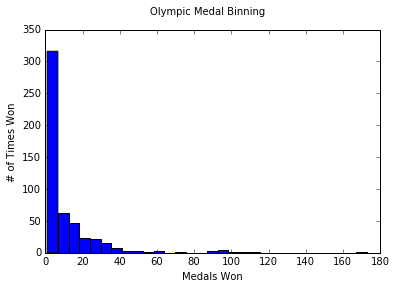

In [26]:
plt.hist(df['olympic_medals'], 30)
plt.suptitle('Olympic Medal Binning')
plt.xlabel('Medals Won')
plt.ylabel('# of Times Won')
plt.show;

This histogram shows that the majority of nations win 0-8 medals per Olympics. It is difficult to win more than 80 medals, but some countries have been able to achieve this. There is an outlier on the far right where the USA won 174 medals when they hosted the Olympics in 1984.

In [27]:
df['gdp_per_cap'] = df['gdp']/df['population']
print df['gdp_per_cap'][:4]

0            NaN
1    1806.804876
2     935.460427
3    1273.691659
Name: gdp_per_cap, dtype: float64


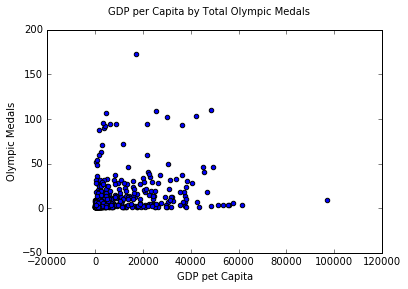

In [28]:
plt.scatter(df['gdp_per_cap'], df['olympic_medals'])
plt.suptitle('GDP per Capita by Total Olympic Medals')
plt.xlabel('GDP pet Capita')
plt.ylabel('Olympic Medals')
plt.show;

The scatter plot of GDP per Capita by Medal Count does not show a strong correlation. 

Full GDP might.

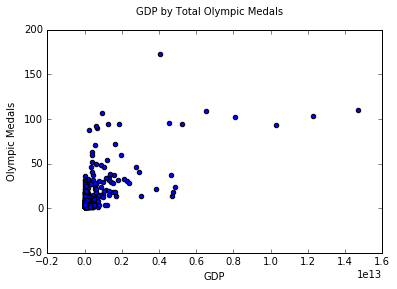

In [29]:
plt.scatter(df['gdp'], df['olympic_medals'])
plt.suptitle('GDP by Total Olympic Medals')
plt.xlabel('GDP')
plt.ylabel('Olympic Medals')
plt.show;

GDP has a stronger coorelation than GDP per Capita. I believe this is because GDP is linked to Population. The higher the population, the more wealth a country can produce and also the country has a bigger pool of athletes to select from for the Olympics.

Let us next take a look at GDP by Population and how Population might coorelate to Olympic Medals.

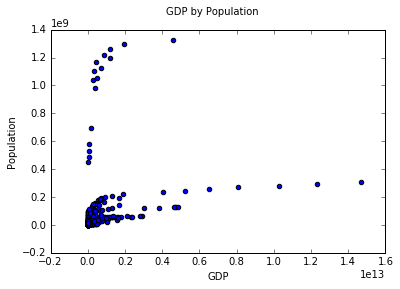

In [30]:
plt.scatter(df['gdp'], df['population'])
plt.suptitle('GDP by Population')
plt.xlabel('GDP')
plt.ylabel('Population')
plt.show;

On the x-axis we have GDP and on the y-axis is population. This is showing us that population does not necessarily mean the country will generate more wealth. The population's of India and China are stretching the y-axis. 

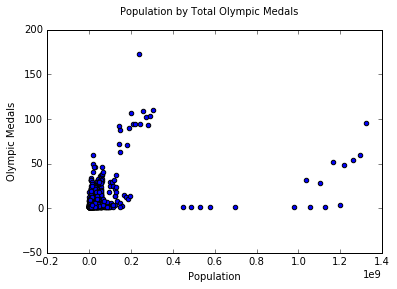

In [31]:
plt.scatter(df['population'], df['olympic_medals'])
plt.suptitle('Population by Total Olympic Medals')
plt.xlabel('Population')
plt.ylabel('Olympic Medals')
plt.show;

Population by Olympic Medals does show some coorelation, but is again being strung out by India and China.

Population does not look to be as strong an indicator as GDP. GDP measures Population to an extenet and also somewhat measures how much money the athletes have access to for training. GDP seems to be our best predictor so far.

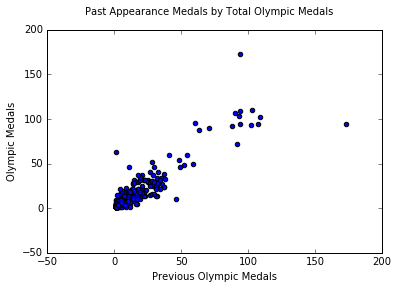

In [32]:
plt.scatter(df['prev_olympic_medals'], df['olympic_medals'])
plt.suptitle('Past Appearance Medals by Total Olympic Medals')
plt.xlabel('Previous Olympic Medals')
plt.ylabel('Olympic Medals')
plt.show;

Now __this is interesting!__ There is a strong coorelation between a country's previous Olympic performance and how they did in the next Olympics.

The Olympics are always growing though! More events are added, which means more medals are awarded. It would be more accurate to compare percentage of medals won. 

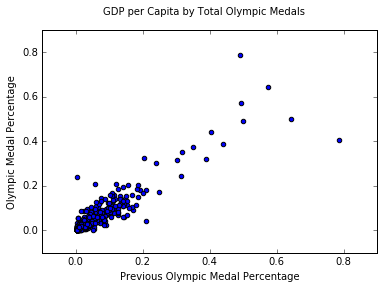

In [33]:
plt.scatter(df['prev_olympic_medal_percentage'], df['olympic_medal_percentage'])
plt.suptitle('GDP per Capita by Total Olympic Medals')
plt.xlabel('Previous Olympic Medal Percentage')
plt.ylabel('Olympic Medal Percentage')
plt.show;

Comparing percentages tightens our coorelation up even more and allows us to pass a "Number of Events" predictor into our model. 

After our data exploration we are ready to build and test some models. I think GDP and Previous Olympic Medal performance are going to be the two best indicators to use.

### Approach 2

Approach 2 is to explore if fitting the model by country is more predictive than running the regression over all countries together. We will have smaller sample size when we filter down to one country, so that could be a shortcoming of this approach.

In [34]:
from sklearn.linear_model import LinearRegression

country_label = 'USA'
feature_labels = ['available_medals', 'prev_olympic_medal_percentage', 'gdp', 'region_advantage']
target_label = 'olympic_medals'

def country_regression(country_abv, df):
    country_df = df[df.country_abv == country_abv]
    X = country_df.loc[:, feature_labels]
    y = country_df.loc[:, target_label]

    return LinearRegression().fit(X, y)

modelReg = country_regression(country_label, df)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## Cross Validation

In [ ]:
from sklearn.cross_validation import KFold

country_df = df[df.country_abv == country_label]

y = country_df.olympic_medals
kf = KFold(len(y), n_folds=5)

for train_index, test_index in kf:
    
    df_train, df_test = country_df.iloc[train_index, :], country_df.iloc[test_index, :]
    y_test = y[test_index]
    
    modelK = country_regression(country_label, df_train)
    
    y_predictied = modelK.predict(df_test)


## Conclusion

No one should be using my model to place bets on the Olympics, but I learned a lot from applying my new knowledge from the bootcamp. 